In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('chatgpt_reviews.csv')

In [5]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [7]:
df.shape

(196727, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [11]:
df.isnull().sum()

Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Review Id      0
Review         0
Ratings        0
Review Date    0
dtype: int64

In [22]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 326.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 717.5 kB/s eta 0:00:01
   ----------------- ---------------------- 266.2/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.2 MB/s eta 0:00:00


we will add sentiment labels based on the review content. We will use the textblob library in Python. TextBlob has a built-in sentiment analyzer powered by a pre-trained model.
It calculates the polarity of the text on a scale from -1 to 1:

In [19]:
from textblob import TextBlob

def get_sentiment(review):
    sentiment = TextBlob(review).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'Neutral'

In [20]:
df['Sentiment'] = df['Review'].apply(get_sentiment)

In [22]:
df.head()

,Review Id,Review,Ratings,Review Date,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,Positive


In [23]:
df['Sentiment'].value_counts()

Positive    150122
Neutral      38444
negative      8155
Name: Sentiment, dtype: int64

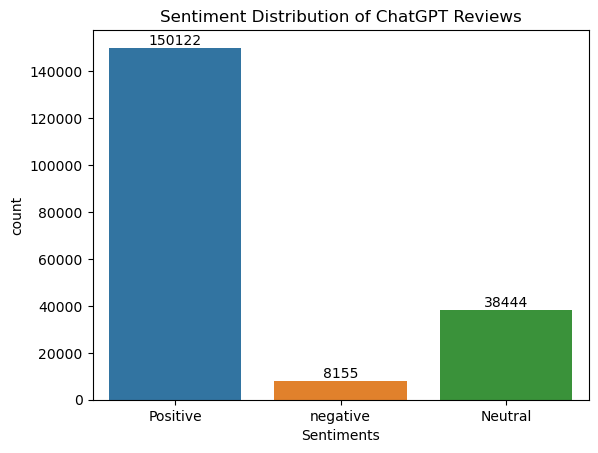

In [24]:
ax = sns.countplot(x='Sentiment', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel("Sentiments")
plt.title('Sentiment Distribution of ChatGPT Reviews')
plt.show()

150 thousand user has positive review about chatgpt , 38 thousand user has neutral feedback and near 8 thousND has negative review about chatgpt.
which make sense that chatgpt is favourable for most of the users

In [146]:
df

,Review Id,Review,Ratings,Review Date,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,Positive
...,...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,2023-07-27 16:26:31,Neutral
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,2023-09-23 16:25:18,Neutral
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,2023-11-08 13:57:14,Neutral
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,2023-07-25 15:32:57,Neutral


In [152]:
df = df.reset_index(drop = True)

In [154]:
df.to_csv('new_chatgpt_review.csv')

In [156]:
from IPython.display import FileLink

# Display download link
FileLink('new_chatgpt_review.csv')                   # line 152,154,156 are optinal becz i want this sentiment vali file for doing analysis in power BI

C:\Users\Vaibhav\Python-Data-Analysis-project\ChatGPT Reviews Analysis\new_chatgpt_review.csv

## Analyze wht users like abpout chatgpt

for that we will focus on positive sentiment. we will extract the phrases used in positive review which help us to understand what users appreciate about chatgpt

In [28]:
positive_reviews = df[df['Sentiment'] == 'Positive']['Review']

In [29]:
positive_reviews

0                                                      good
1                                                      good
2                                                  nice app
3                                                  nice, ig
4         this is a great app, the bot is so accurate to...
                                ...                        
196704                                       First download
196711                                            very goid
196713                                             Just wow
196714                                         first review
196716                                            Super app
Name: Review, Length: 150122, dtype: object

In [36]:

# use CountVectorizer to extract common phrases (n-grams)
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=100)
X = vectorizer.fit_transform(positive_reviews)

# sum the counts of each phrase
phrase_counts = X.sum(axis=0)
phrases = vectorizer.get_feature_names_out()
phrase_freq = [(phrases[i], phrase_counts[0, i]) for i in range(len(phrases))]

# sort phrases by frequency
phrase_freq = sorted(phrase_freq, key=lambda x: x[1], reverse=True)

phrase_df = pd.DataFrame(phrase_freq, columns=['Phrase', 'Frequency'])

In [37]:
phrase_df

,Phrase,Frequency
0,good app,5886
1,best app,4913
2,nice app,3327
3,great app,3130
4,chat gpt,2672
...,...,...
95,perfect app,227
96,app nice,224
97,really good app,224
98,app thanks,222


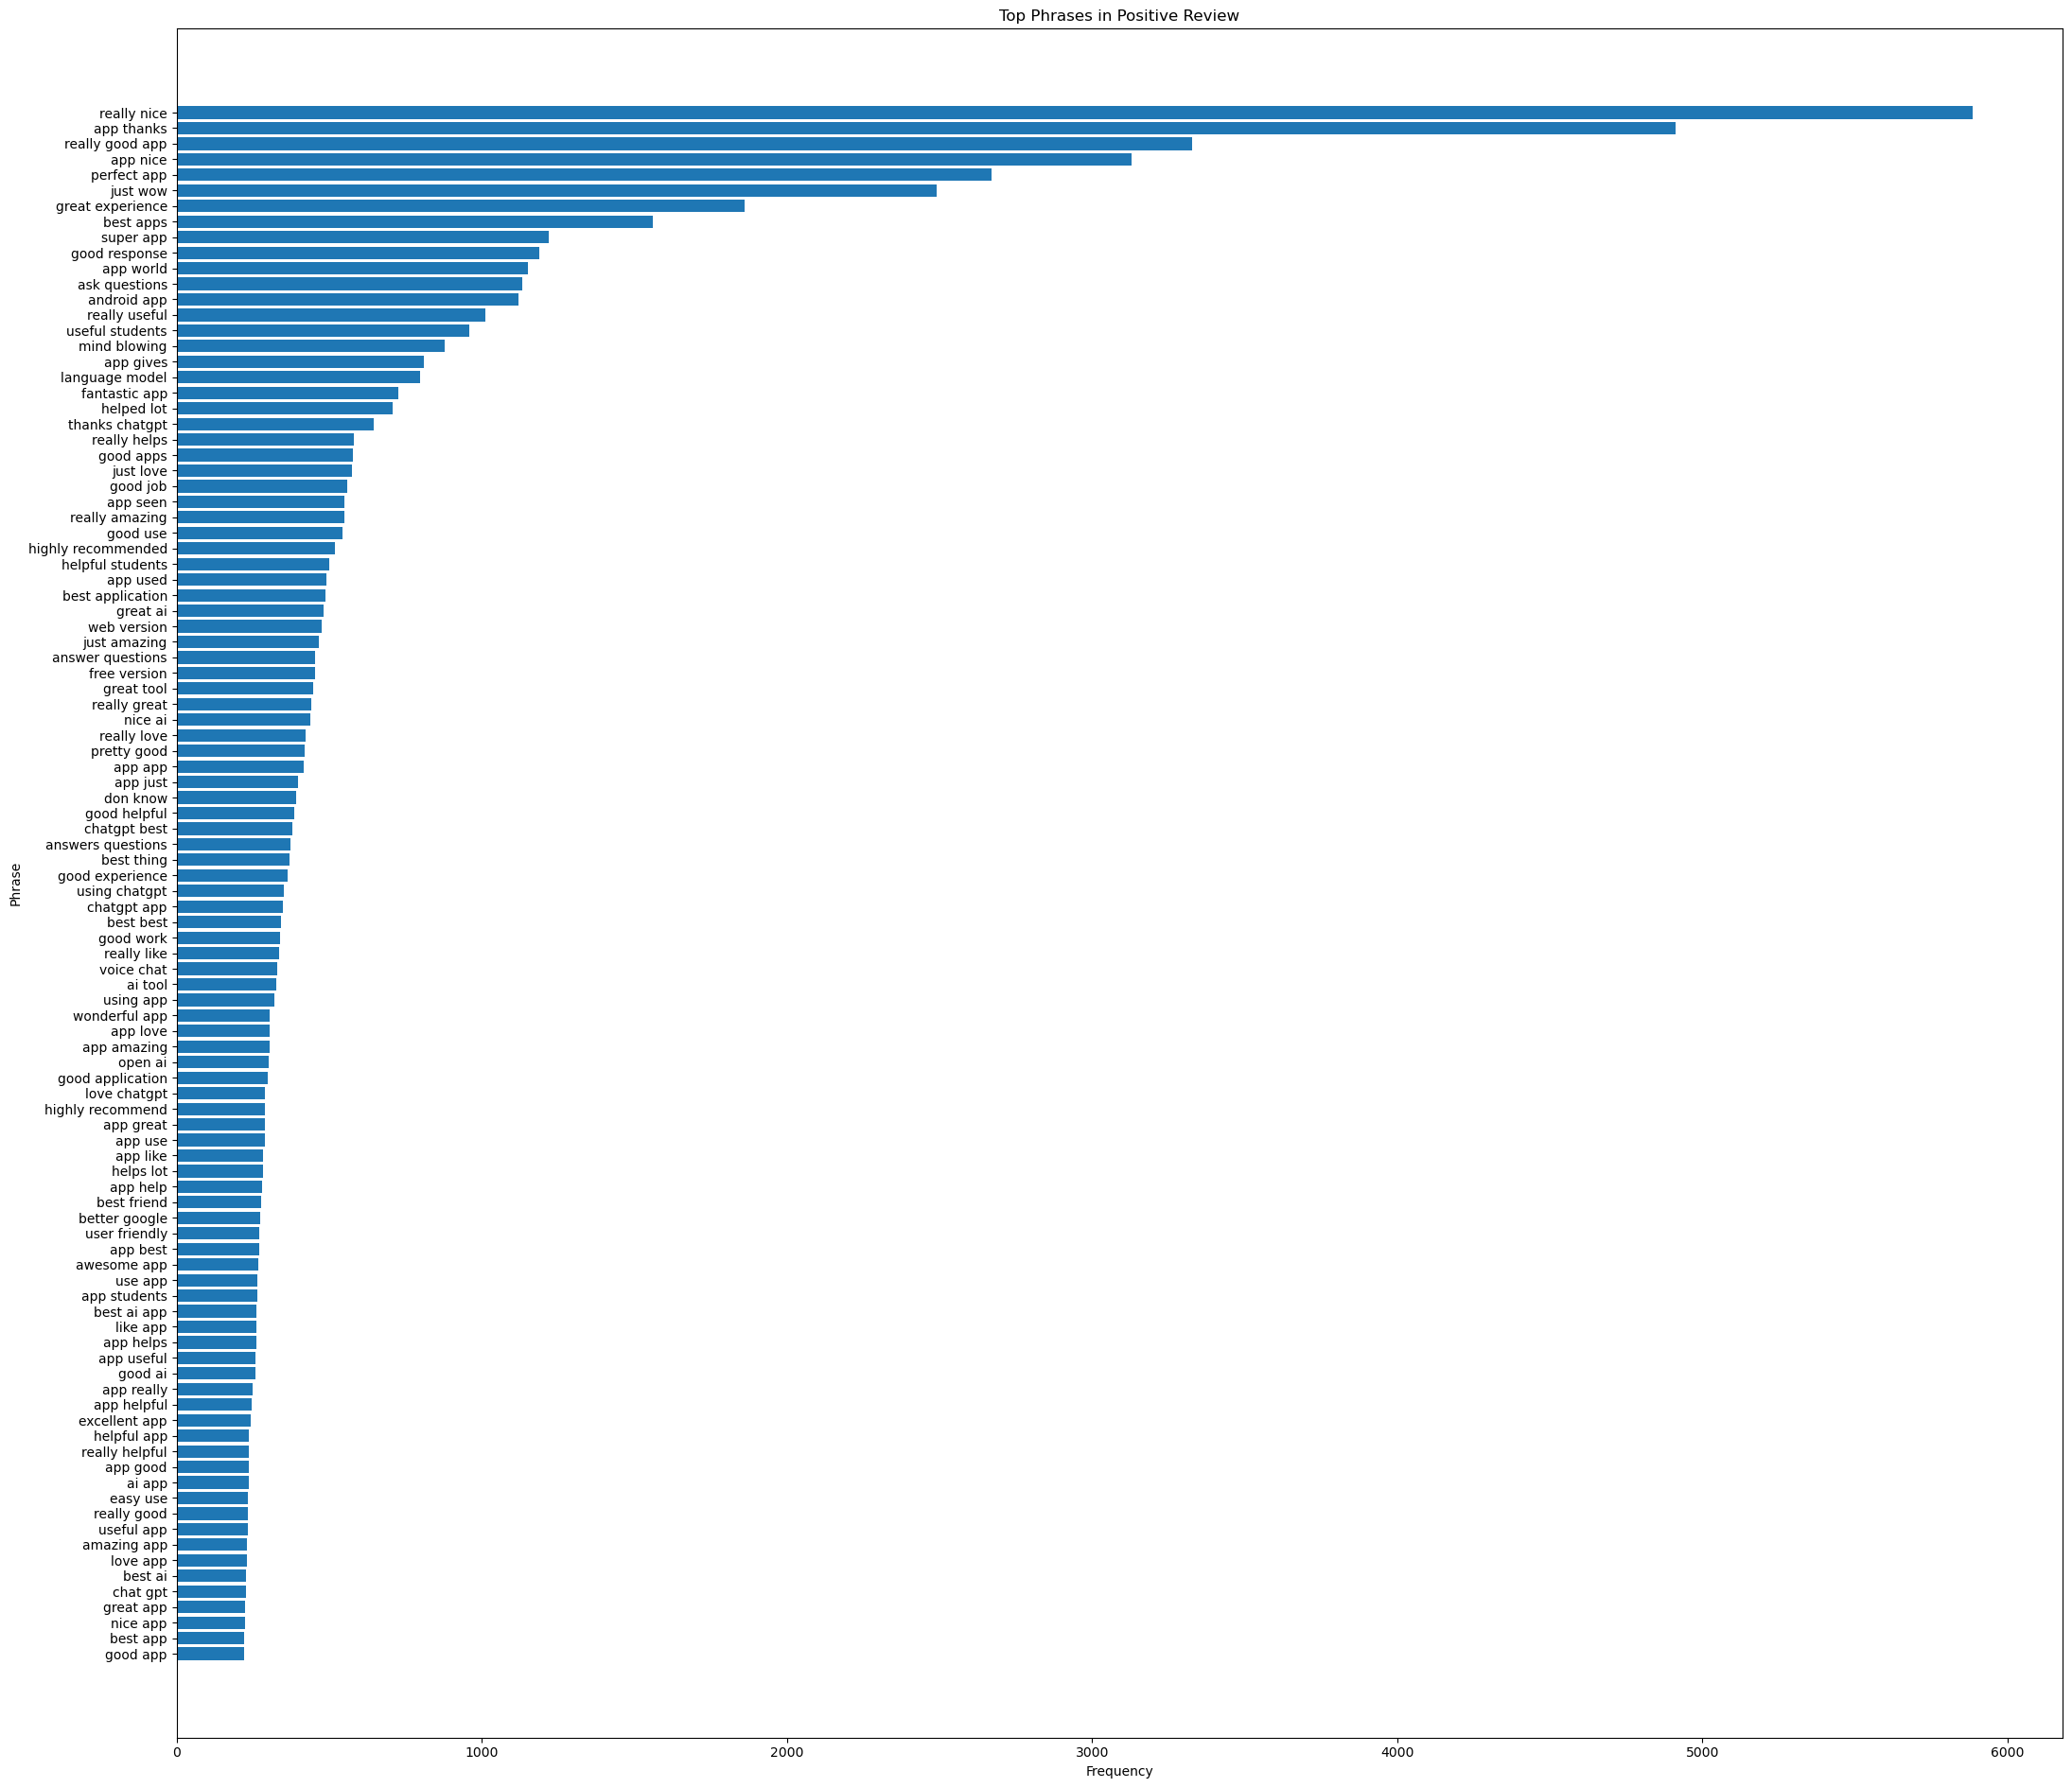

In [99]:
plt.figure(figsize=(22,19))
plt.barh(width = phrase_df['Frequency'].sort_values(ascending=True), y = phrase_df['Phrase'])
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.title('Top Phrases in Positive Review')
plt.tight_layout()  # Adjusts the layout to ensure everything fits well
plt.show()

## Analyzw what users dont like about chatgpt 

In [57]:
negative_reviews = df[df['Sentiment'] == 'negative']['Review']

In [61]:
y = vectorizer.fit_transform(negative_reviews)

phrase_count_neg = y.sum(axis=0)
phrases_neg = vectorizer.get_feature_names_out()
phrase_freq_neg = [(phrases_neg[i], phrase_count_neg[0,i]) for i in range(len(phrases_neg))]

phrase_freq_neg = sorted(phrase_freq_neg, key = lambda x: x[1], reverse=True)

neg_phrase_df = pd.DataFrame(phrase_freq_neg, columns=['neg_phrase','frequency'])

In [63]:
neg_phrase_df

,neg_phrase,frequency
0,chat gpt,227
1,worst app,133
2,wrong answer,123
3,bad app,120
4,gives wrong,112
...,...,...
95,feel like,19
96,knowledge base,19
97,app does,18
98,new chat,18


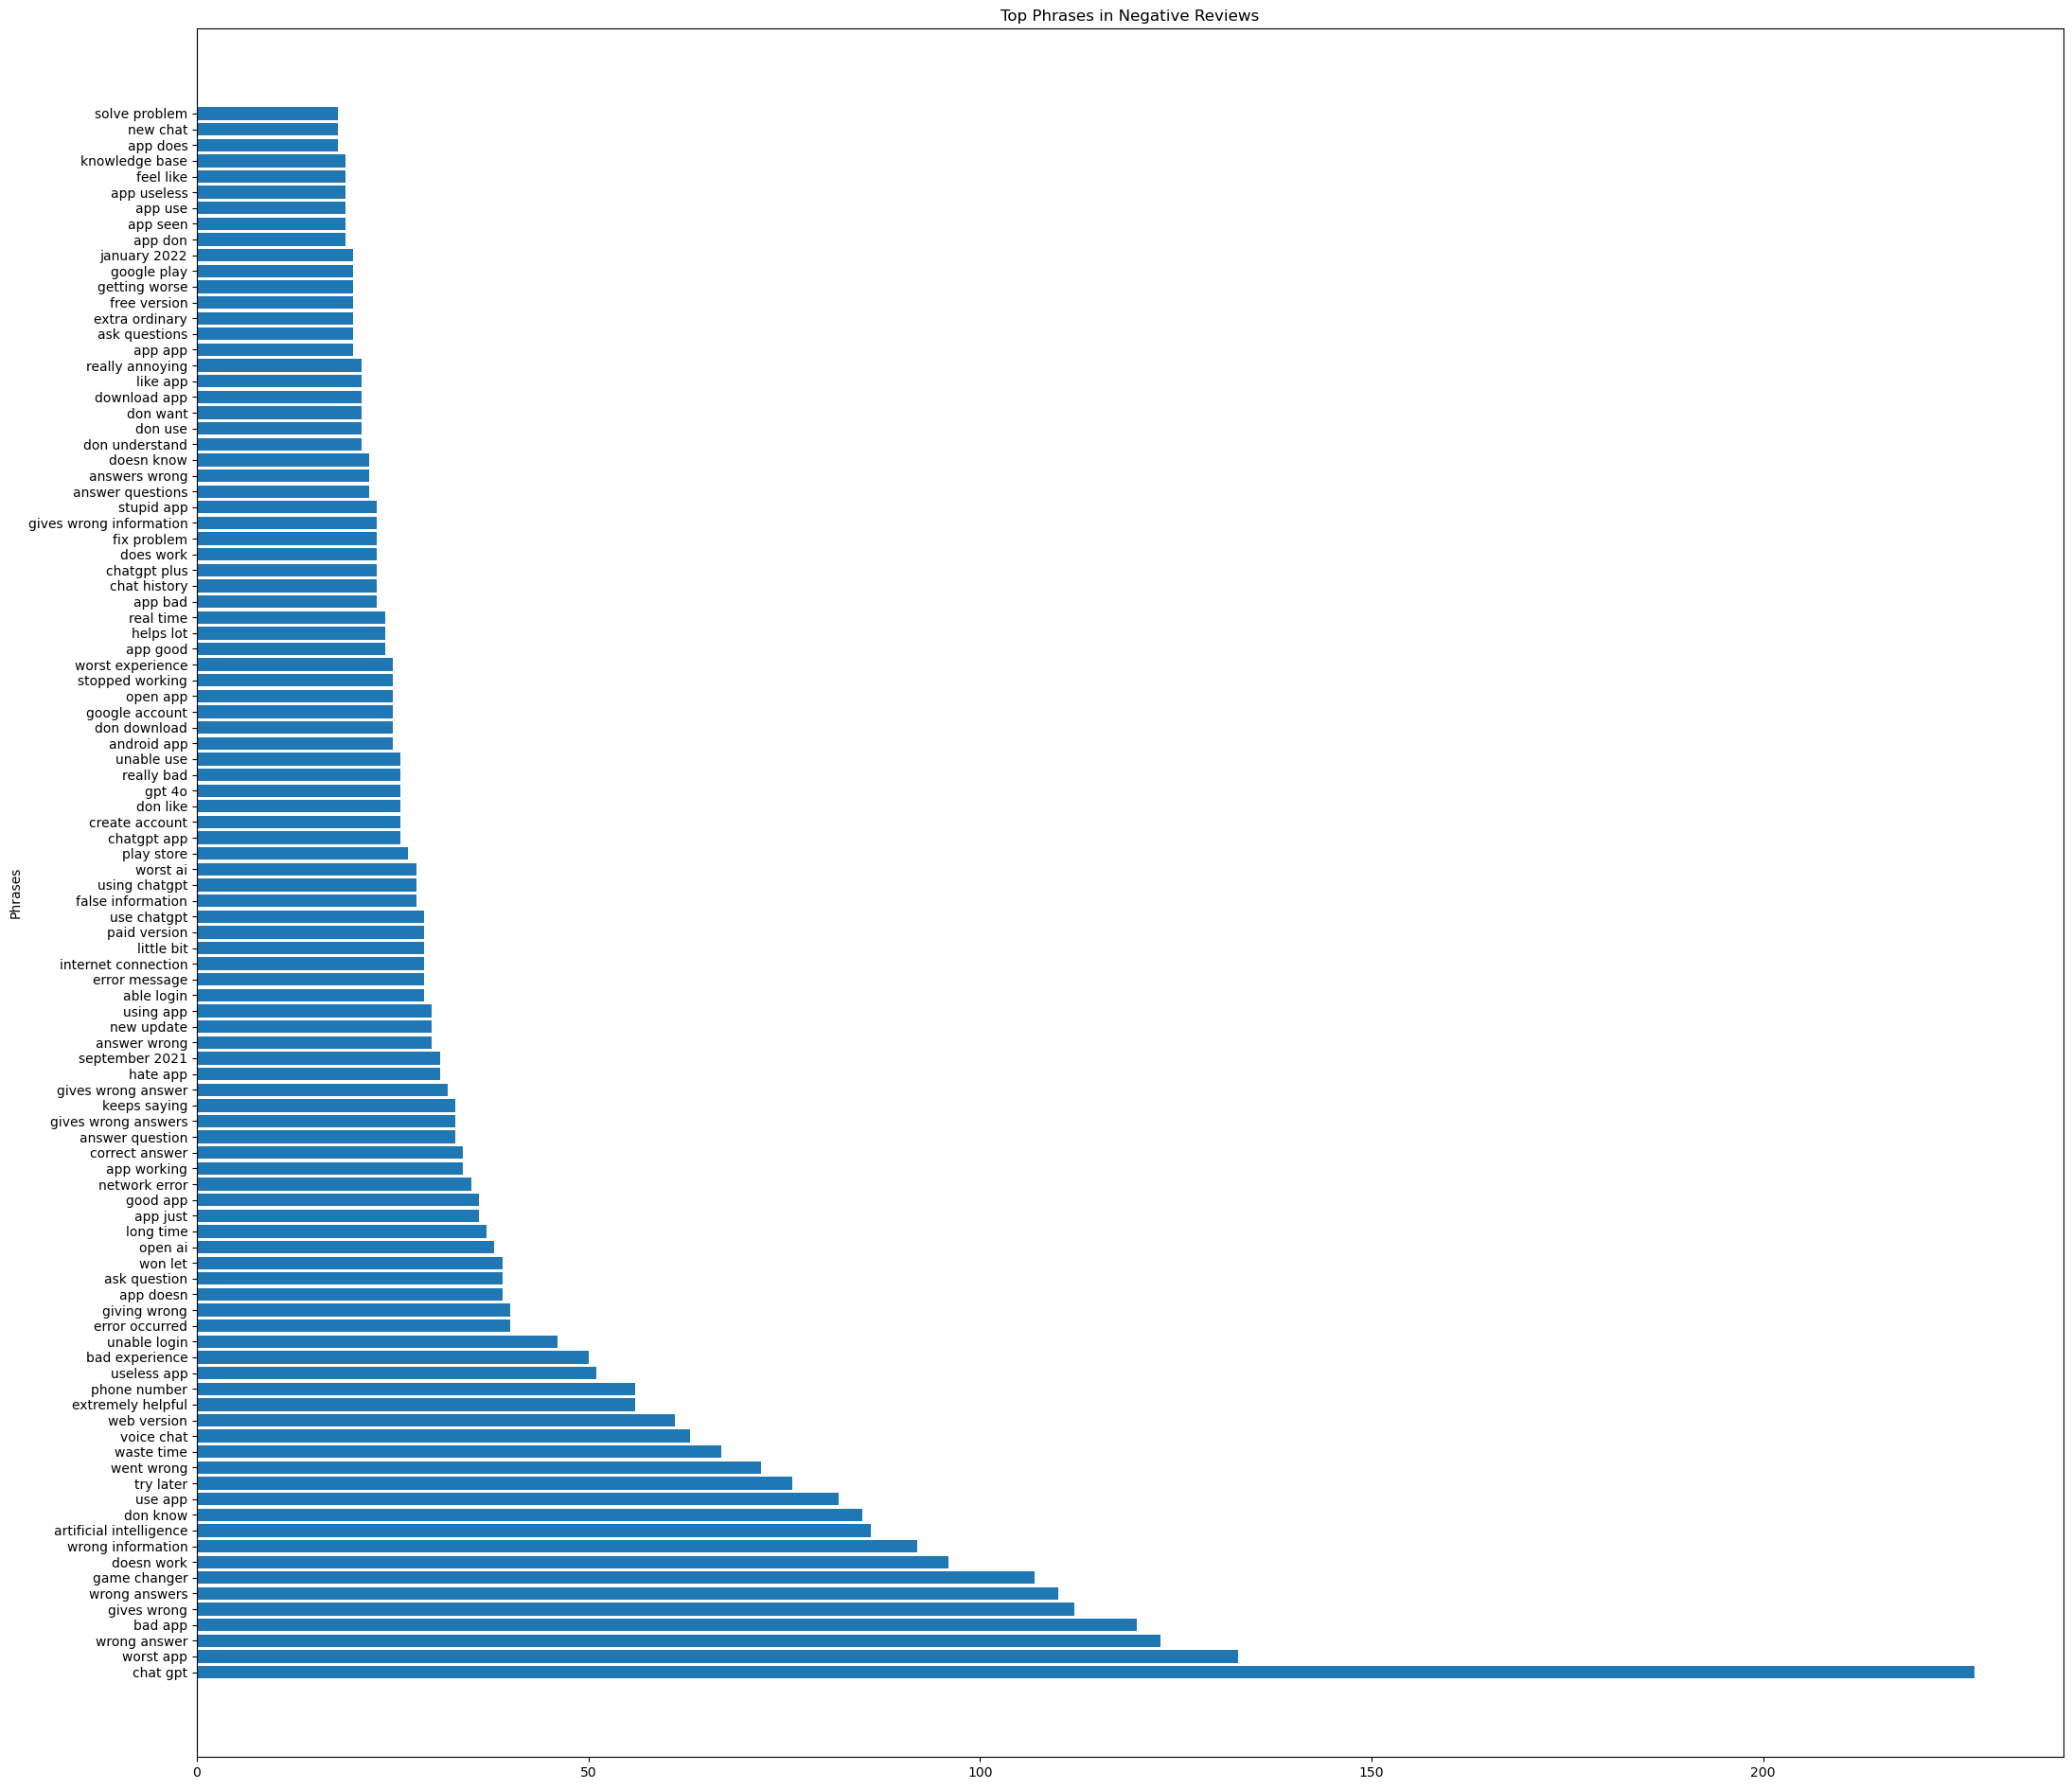

In [83]:
plt.figure(figsize=(22,19))
plt.barh( width=neg_phrase_df['frequency'],y = neg_phrase_df['neg_phrase'])
plt.title('Top Phrases in Negative Reviews')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

The visualization shows that users’ main complaints about ChatGPT include it being labelled as a “bad app” or “useless app”, with issues such as “doesn’t work”, “error occurred”, and “network error” frequently mentioned in negative reviews. Users also express frustration with incorrect or misleading answers, technical problems like “error messages” and difficulty using specific features like “voice chat”.

These issues suggest that users are dissatisfied with the app’s reliability, accuracy, and overall performance.

## Probelms face dby users in chatgpt

In [86]:
# grouping similar phrases into broader problem categories
problem_keywords = {
    'Incorrect Answers': ['wrong answer', 'gives wrong', 'incorrect', 'inaccurate', 'wrong'],
    'App Performance': ['slow', 'lag', 'crash', 'bug', 'freeze', 'loading', 'glitch', 'worst app', 'bad app', 'horrible', 'terrible'],
    'User Interface': ['interface', 'UI', 'difficult to use', 'confusing', 'layout'],
    'Features Missing/Not Working': ['feature missing', 'not working', 'missing', 'broken', 'not available'],
    'Quality of Responses': ['bad response', 'useless', 'poor quality', 'irrelevant', 'nonsense']
}

# initialize a dictionary to count problems
problem_counts = {key: 0 for key in problem_keywords.keys()}

# count occurrences of problem-related phrases in negative reviews
for phrase, count in phrase_freq_neg:
    for problem, keywords in problem_keywords.items():
        if any(keyword in phrase for keyword in keywords):
            problem_counts[problem] += count
            break

problem_df = pd.DataFrame(list(problem_counts.items()), columns=['Problem', 'Frequency'])

In [90]:
problem_df

,Problem,Frequency
0,Incorrect Answers,689
1,App Performance,253
2,User Interface,0
3,Features Missing/Not Working,0
4,Quality of Responses,70


Text(0.5, 1.0, 'Common Problems Faced by Users in ChatGPT')

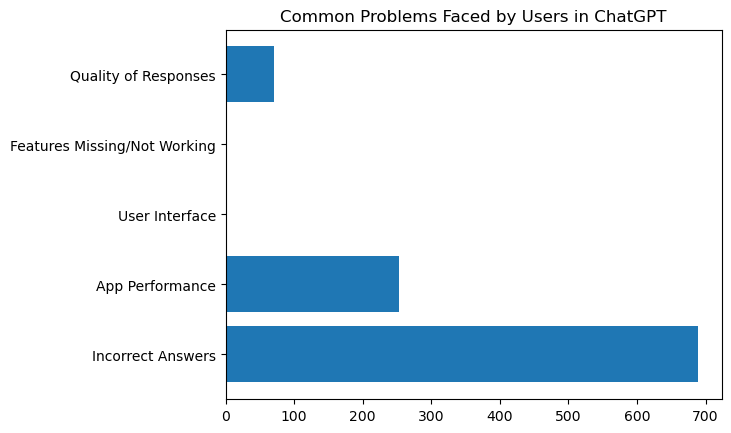

In [101]:
plt.barh(width = problem_df['Frequency'], y = problem_df['Problem'])
plt.title('Common Problems Faced by Users in ChatGPT')

The visualization indicates that the most common problem users face with ChatGPT is receiving “Incorrect Answers”, which is the most frequent issue by a significant margin. Other notable problems include “App Performance”, where users experience issues with the app’s functionality, and concerns about the “Quality of Responses”.

These findings suggest areas where improvements could be made to enhance the user experience with ChatGPT.

## Analyze hoe reviews changed over time 

In [107]:
df.head(2)

,Review Id,Review,Ratings,Review Date,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive


In [131]:
df['Review Date'] = pd.to_datetime(df['Review Date'])

In [133]:
sentiment_over_time = df.groupby([df['Review Date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

    .size(): This counts the number of rows in each group. In simpler terms, it counts how many reviews fall into each month-sentiment combination.

3. .unstack(fill_value=0)

    .unstack(): This reshapes the data. It takes the Sentiment column as the new columns and the monthly periods as the index.
    (fill_value=0): This fills any missing values with 0. This is important because if a certain sentiment doesn't occur in a particular month, it will be filled with 0 instead of being missing.

In [136]:
sentiment_over_time

Sentiment,Neutral,Positive,negative
Review Date,,,
2023-07,1810,5994,479
2023-08,1439,4922,440
2023-09,1433,5771,389
2023-10,1169,4408,247
2023-11,1667,6658,394
2023-12,2048,7866,461
2024-01,1952,6904,457
2024-02,1715,6573,460
2024-03,3020,11494,659


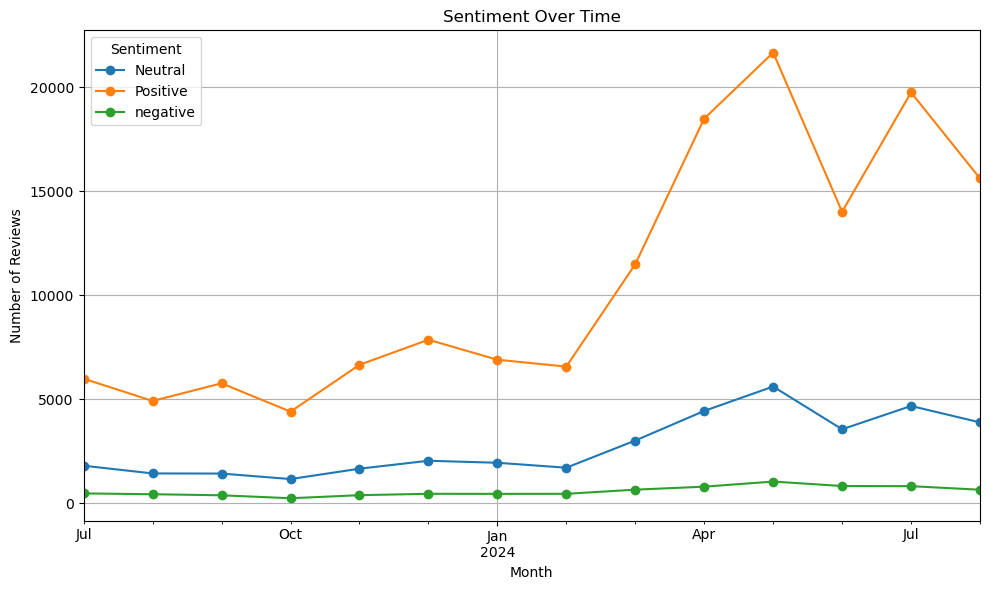

In [138]:
# Plot the line chart
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()  # Convert period index to timestamp for plotting
sentiment_over_time.plot(kind='line', figsize=(10, 6), marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Over Time')
plt.legend(title='Sentiment', loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

The visualization shows that the number of positive reviews  for ChatGPT has generally increased over time, with a significant rise beginning around March 2024, peaking in May 2024, and then slightly declining in July 2024.

Neutral reviews also show a gradual increase over time, with a noticeable peak around May 2024.

Negative reviews have remained relatively stable and low throughout the period, indicating that while more users are sharing their experiences over time, the overall sentiment is largely positive with a steady but minimal increase in negative feedback.